#### Using the data from Question 5, write code the analyze the data and answer the following questions 
#### Note 
- 1. Draw plots to demonstrate the analysis for the following questions and better visualizations 
-2. Write code comments wherever required for code understanding
#### Insights to be drawn -
- Get all the overall ratings for each season and using plots compare the ratings for all the seasons, like season 1 ratings, season 2, and so on.
- Get all the episode names, whose average rating is more than 8 for every season
- Get all the episode names that aired before May 2019
- Get the episode name from each season with the highest and lowest rating
- Get the summary for the most popular ( ratings ) episode in every season


In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
df = pd.read_csv('tvmaze_data.csv')
df.head()

,id,url,name,season,number,type,airdate,airtime,runtime,average rating,summary,medium image link,original image link
0,869671,https://www.tvmaze.com/episodes/869671/westwor...,The Original,1,1,regular,2016-10-02,09:00 PM,68,8.0,A woman named Dolores is a free spirit in the ...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
1,911201,https://www.tvmaze.com/episodes/911201/westwor...,Chestnut,1,2,regular,2016-10-09,09:00 PM,60,7.7,Bernard suspects that someone is sabotaging th...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
2,911204,https://www.tvmaze.com/episodes/911204/westwor...,The Stray,1,3,regular,2016-10-16,09:00 PM,60,7.6,Bernard continues to investigate Dolores' supp...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
3,911205,https://www.tvmaze.com/episodes/911205/westwor...,Dissonance Theory,1,4,regular,2016-10-23,09:00 PM,60,7.9,While Dolores joins William and Logan on their...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...
4,927174,https://www.tvmaze.com/episodes/927174/westwor...,Contrapasso,1,5,regular,2016-10-30,09:00 PM,60,8.0,Dolores takes the first step on her path of di...,https://static.tvmaze.com/uploads/images/mediu...,https://static.tvmaze.com/uploads/images/origi...


In [39]:
# Group by 'Season' and calculate average rating
average_rating = df.groupby('season')['average rating'].mean()

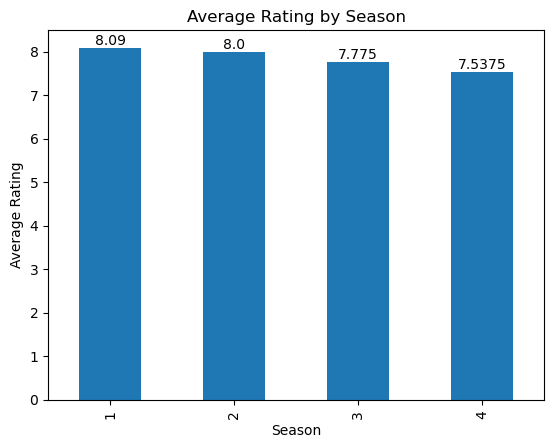

In [40]:
# Plot the bar plot
ax = average_rating.plot(kind='bar')

# Add labels and title
plt.xlabel('Season')
plt.ylabel('Average Rating')
plt.title('Average Rating by Season')
# Add value labels on top of each bar
for i, v in enumerate(average_rating):
    ax.text(i, v, str(v), ha='center', va='bottom')

#### Insight
- Season 1 got the highest rating. 
- Trend is declining from season1 to season 4.

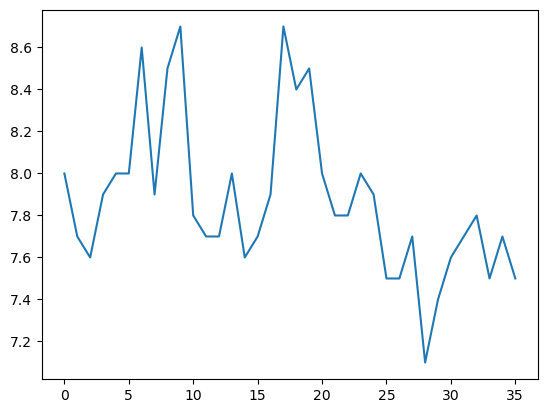

In [42]:
plt.plot(df['average rating'])

In [55]:
# Get all the episode names, whose average rating is more than 8 for every season
names_of_best_rating = df[df['average rating']>8]['name']
print(f"{len(names_of_best_rating)} is out {len(df) } are he episode names, whose average rating is more than 8 for every season")
names_of_best_rating

6 is out 36 are he episode names, whose average rating is more than 8 for every season


6                 Trompe L'Oeil
8     The Well-Tempered Clavier
9            The Bicameral Mind
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [57]:
# Get all the episode names that aired before May 2019
df['airdate']=pd.to_datetime(df['airdate'], format='%Y/%m/%d')
filtered_episodes = df[df['airdate'] < '2019-05-01']['name']
print(f"{len(filtered_episodes)} is out {len(df) } the episode names that aired before May 2019")
filtered_episodes

20 is out 36 the episode names that aired before May 2019


0                  The Original
1                      Chestnut
2                     The Stray
3             Dissonance Theory
4                   Contrapasso
5                 The Adversary
6                 Trompe L'Oeil
7                   Trace Decay
8     The Well-Tempered Clavier
9            The Bicameral Mind
10           Journey Into Night
11                      Reunion
12              Virtù e Fortuna
13     The Riddle of the Sphinx
14                 Akane No Mai
15                  Phase Space
16                 Les Écorchés
17                      Kiksuya
18              Vanishing Point
19                The Passenger
Name: name, dtype: object

In [70]:
# Get the episode name with the highest rating for each season
highest_rating = df.loc[df.groupby('season')['average rating'].idxmax(), ['season', 'name']]
highest_rating.columns = ['Season', 'Episode with Highest Rating']

# Get the episode name with the lowest rating for each season
lowest_rating = df.loc[df.groupby('season')['average rating'].idxmin(), ['season', 'name']]
lowest_rating.columns = ['Season', 'Episode with Lowest Rating']

# Merge the results into a single DataFrame
result = pd.merge(highest_rating, lowest_rating, on='Season')

# Display the result
print(result)

   Season Episode with Highest Rating Episode with Lowest Rating
0       1          The Bicameral Mind                  The Stray
1       2                     Kiksuya               Akane No Mai
2       3                Parce Domine                Decoherence
3       4                    Zhuangzi               The Auguries


In [72]:
# Get the index of the highest-rated episode in each season
max_rating_indices = df.groupby('season')['average rating'].idxmax()

# Select the corresponding rows based on the indices
most_popular_episodes = df.loc[max_rating_indices]

# Display the summary for the most popular episodes
print(most_popular_episodes['summary'])

9     Delores finds out the truth about William's fa...
17    Another of Westworld's Host revolutionaries is...
20    If you're stuck in a loop, try walking in a st...
32                                        God is bored.
Name: summary, dtype: object
